In [24]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [25]:
customers = pd.read_csv("Customers.csv")
transactions = pd.read_csv("Transactions.csv")
products = pd.read_csv("products.csv")
# Rename columns for clarity
products.rename(columns={"Price": "ProductPrice"}, inplace=True)
transactions.rename(columns={"Price": "TransactionPrice"}, inplace=True)

# Merge datasets
df = transactions.merge(customers, on="CustomerID", how="inner").merge(products, on="ProductID", how="inner")
df = pd.read_csv("Final_Data.csv")

In [26]:
print("Dataset Preview:")
print(df.head())

Dataset Preview:
  TransactionID CustomerID ProductID      TransactionDate  Quantity  \
0        T00001      C0199      P067  2024-08-25 12:38:23         1   
1        T00112      C0146      P067  2024-05-27 22:23:54         1   
2        T00166      C0127      P067  2024-04-25 07:38:55         1   
3        T00272      C0087      P067  2024-03-26 22:55:37         2   
4        T00363      C0070      P067  2024-03-21 15:10:10         3   

   TotalValue  TransactionPrice     CustomerName         Region  SignupDate  \
0      300.68            300.68   Andrea Jenkins         Europe  2022-12-03   
1      300.68            300.68  Brittany Harvey           Asia  2024-09-04   
2      300.68            300.68  Kathryn Stevens         Europe  2024-04-04   
3      601.36            300.68  Travis Campbell  South America  2024-04-11   
4      902.04            300.68    Timothy Perez         Europe  2022-03-15   

                       ProductName     Category  ProductPrice MonthYear  \
0  Com

In [27]:
print("\nDataset Info:")
df.info()


Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 16 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   TransactionID     1000 non-null   object 
 1   CustomerID        1000 non-null   object 
 2   ProductID         1000 non-null   object 
 3   TransactionDate   1000 non-null   object 
 4   Quantity          1000 non-null   int64  
 5   TotalValue        1000 non-null   float64
 6   TransactionPrice  1000 non-null   float64
 7   CustomerName      1000 non-null   object 
 8   Region            1000 non-null   object 
 9   SignupDate        1000 non-null   object 
 10  ProductName       1000 non-null   object 
 11  Category          1000 non-null   object 
 12  ProductPrice      1000 non-null   float64
 13  MonthYear         1000 non-null   object 
 14  TransactionYear   1000 non-null   int64  
 15  MonthName         1000 non-null   object 
dtypes: float64(3), int64(2), obj

In [28]:
print("\nMissing Values:")
print(df.isnull().sum())


Missing Values:
TransactionID       0
CustomerID          0
ProductID           0
TransactionDate     0
Quantity            0
TotalValue          0
TransactionPrice    0
CustomerName        0
Region              0
SignupDate          0
ProductName         0
Category            0
ProductPrice        0
MonthYear           0
TransactionYear     0
MonthName           0
dtype: int64


In [29]:
print("\nSummary Statistics:")
print(df.describe())


Summary Statistics:
          Quantity   TotalValue  TransactionPrice  ProductPrice  \
count  1000.000000  1000.000000        1000.00000    1000.00000   
mean      2.537000   689.995560         272.55407     272.55407   
std       1.117981   493.144478         140.73639     140.73639   
min       1.000000    16.080000          16.08000      16.08000   
25%       2.000000   295.295000         147.95000     147.95000   
50%       3.000000   588.880000         299.93000     299.93000   
75%       4.000000  1011.660000         404.40000     404.40000   
max       4.000000  1991.040000         497.76000     497.76000   

       TransactionYear  
count      1000.000000  
mean       2023.996000  
std           0.063151  
min        2023.000000  
25%        2024.000000  
50%        2024.000000  
75%        2024.000000  
max        2024.000000  



Pivot Table (Average TotalValue by Region and Category):
Category            Books    Clothing  Electronics  Home Decor
Region                                                        
Asia           649.392745  850.915345   625.581579  652.782692
Europe         741.631562  773.097660   716.596552  629.108000
North America  643.261385  633.974833   745.273833  470.279492
South America  775.022556  673.706190   744.890127  670.982222


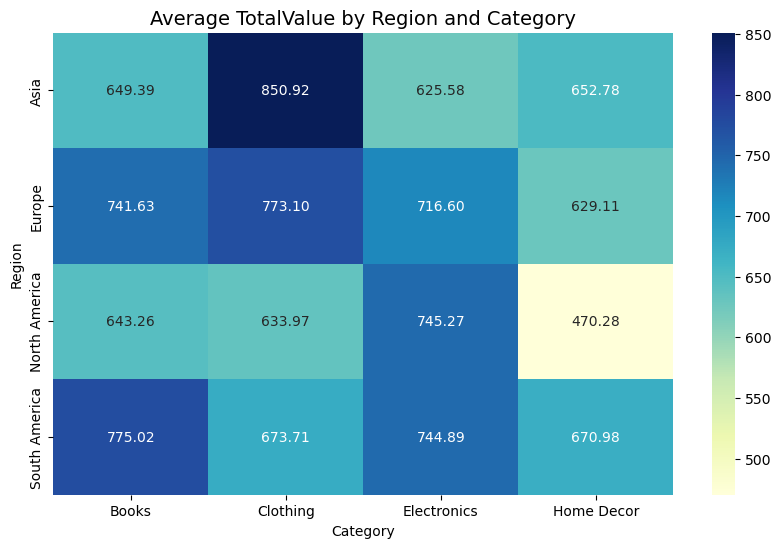

In [30]:
pivot_table = pd.pivot_table(
    df, 
    values='TotalValue', 
    index='Region', 
    columns='Category', 
    aggfunc='mean'
)
print("\nPivot Table (Average TotalValue by Region and Category):")
print(pivot_table)

# Heatmap for pivot table
plt.figure(figsize=(10, 6))
sns.heatmap(pivot_table, annot=True, fmt='.2f', cmap='YlGnBu')
plt.title('Average TotalValue by Region and Category', fontsize=14)
plt.show()

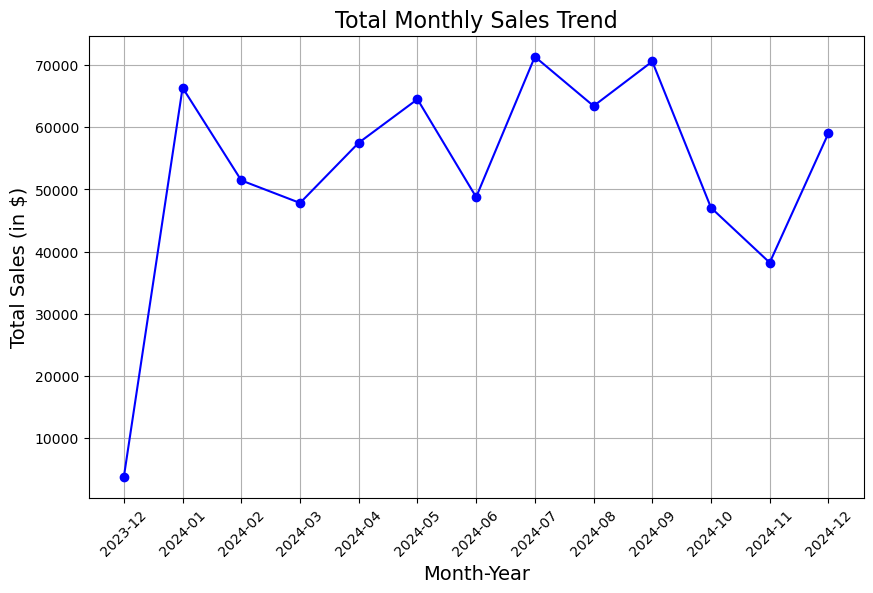

In [31]:
# Grouping and Aggregation
monthly_sales = df.groupby('MonthYear')['TotalValue'].sum().reset_index()

# Plotting
plt.figure(figsize=(10, 6))
plt.plot(monthly_sales['MonthYear'], monthly_sales['TotalValue'], marker='o', color='b')
plt.title('Total Monthly Sales Trend', fontsize=16)
plt.xlabel('Month-Year', fontsize=14)
plt.ylabel('Total Sales (in $)', fontsize=14)
plt.xticks(rotation=45)
plt.grid()
plt.show()


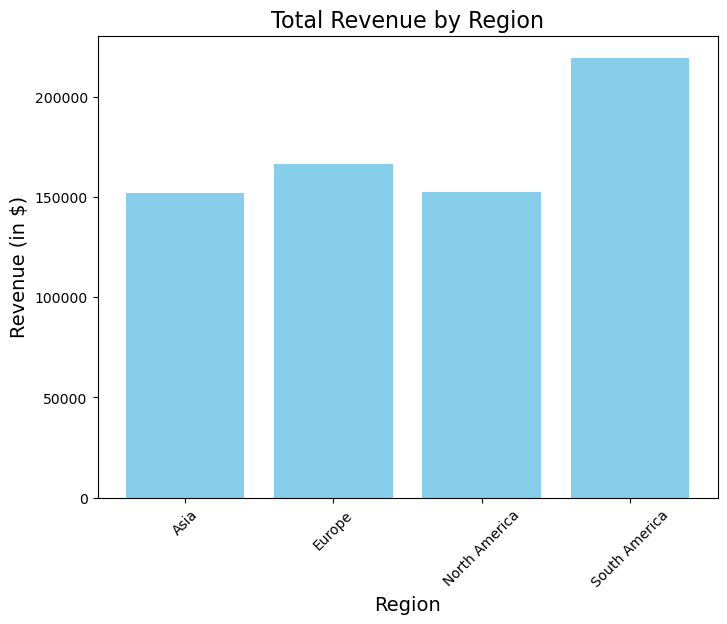

In [32]:
# Grouping and Aggregation
region_revenue = df.groupby('Region')['TotalValue'].sum().reset_index()

# Plotting
plt.figure(figsize=(8, 6))
plt.bar(region_revenue['Region'], region_revenue['TotalValue'], color='skyblue')
plt.title('Total Revenue by Region', fontsize=16)
plt.xlabel('Region', fontsize=14)
plt.ylabel('Revenue (in $)', fontsize=14)
plt.xticks(rotation=45)
plt.show()


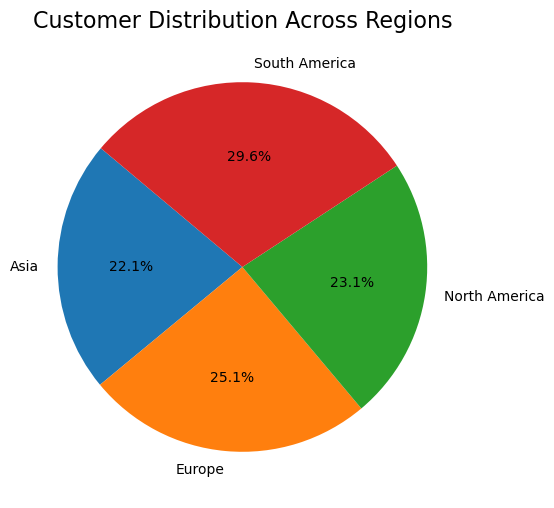

In [33]:
# Aggregation
customer_distribution = df.groupby('Region')['CustomerID'].nunique().reset_index()

# Plotting
plt.figure(figsize=(8, 6))
plt.pie(customer_distribution['CustomerID'], labels=customer_distribution['Region'], autopct='%1.1f%%', startangle=140)
plt.title('Customer Distribution Across Regions', fontsize=16)
plt.show()


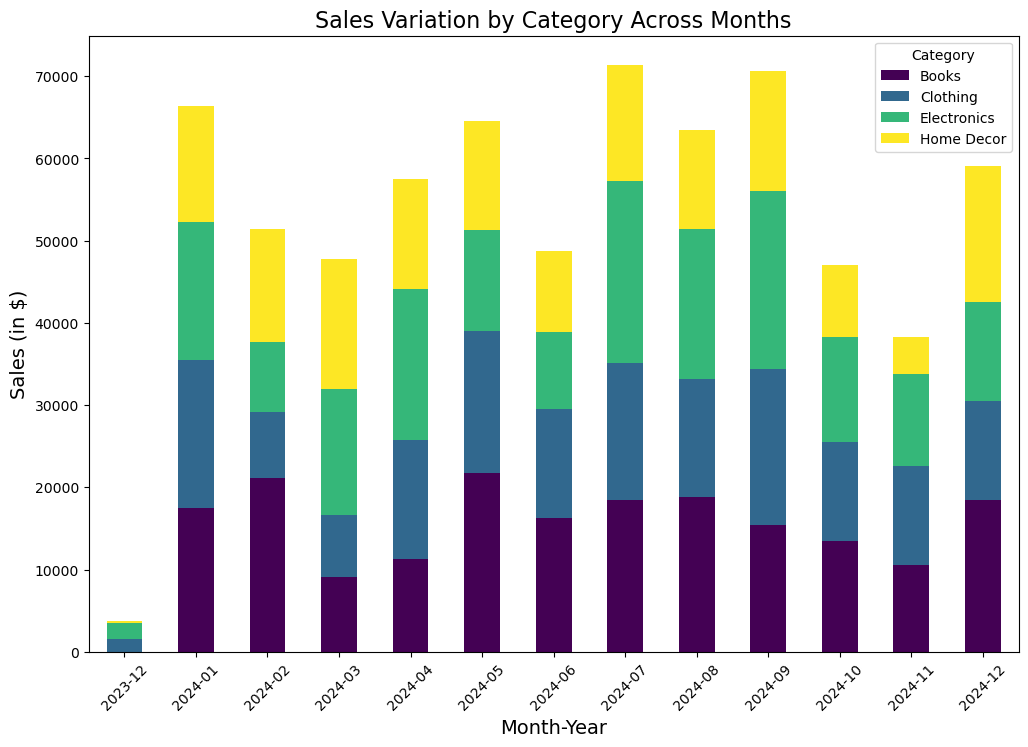

In [34]:
# Pivot Table for Aggregation
category_monthly = df.pivot_table(index='MonthYear', columns='Category', values='TotalValue', aggfunc='sum')

# Plotting
category_monthly.plot(kind='bar', stacked=True, figsize=(12, 8), colormap='viridis')
plt.title('Sales Variation by Category Across Months', fontsize=16)
plt.xlabel('Month-Year', fontsize=14)
plt.ylabel('Sales (in $)', fontsize=14)
plt.xticks(rotation=45)
plt.legend(title='Category')
plt.show()


C:\Users\Vaishnavi\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


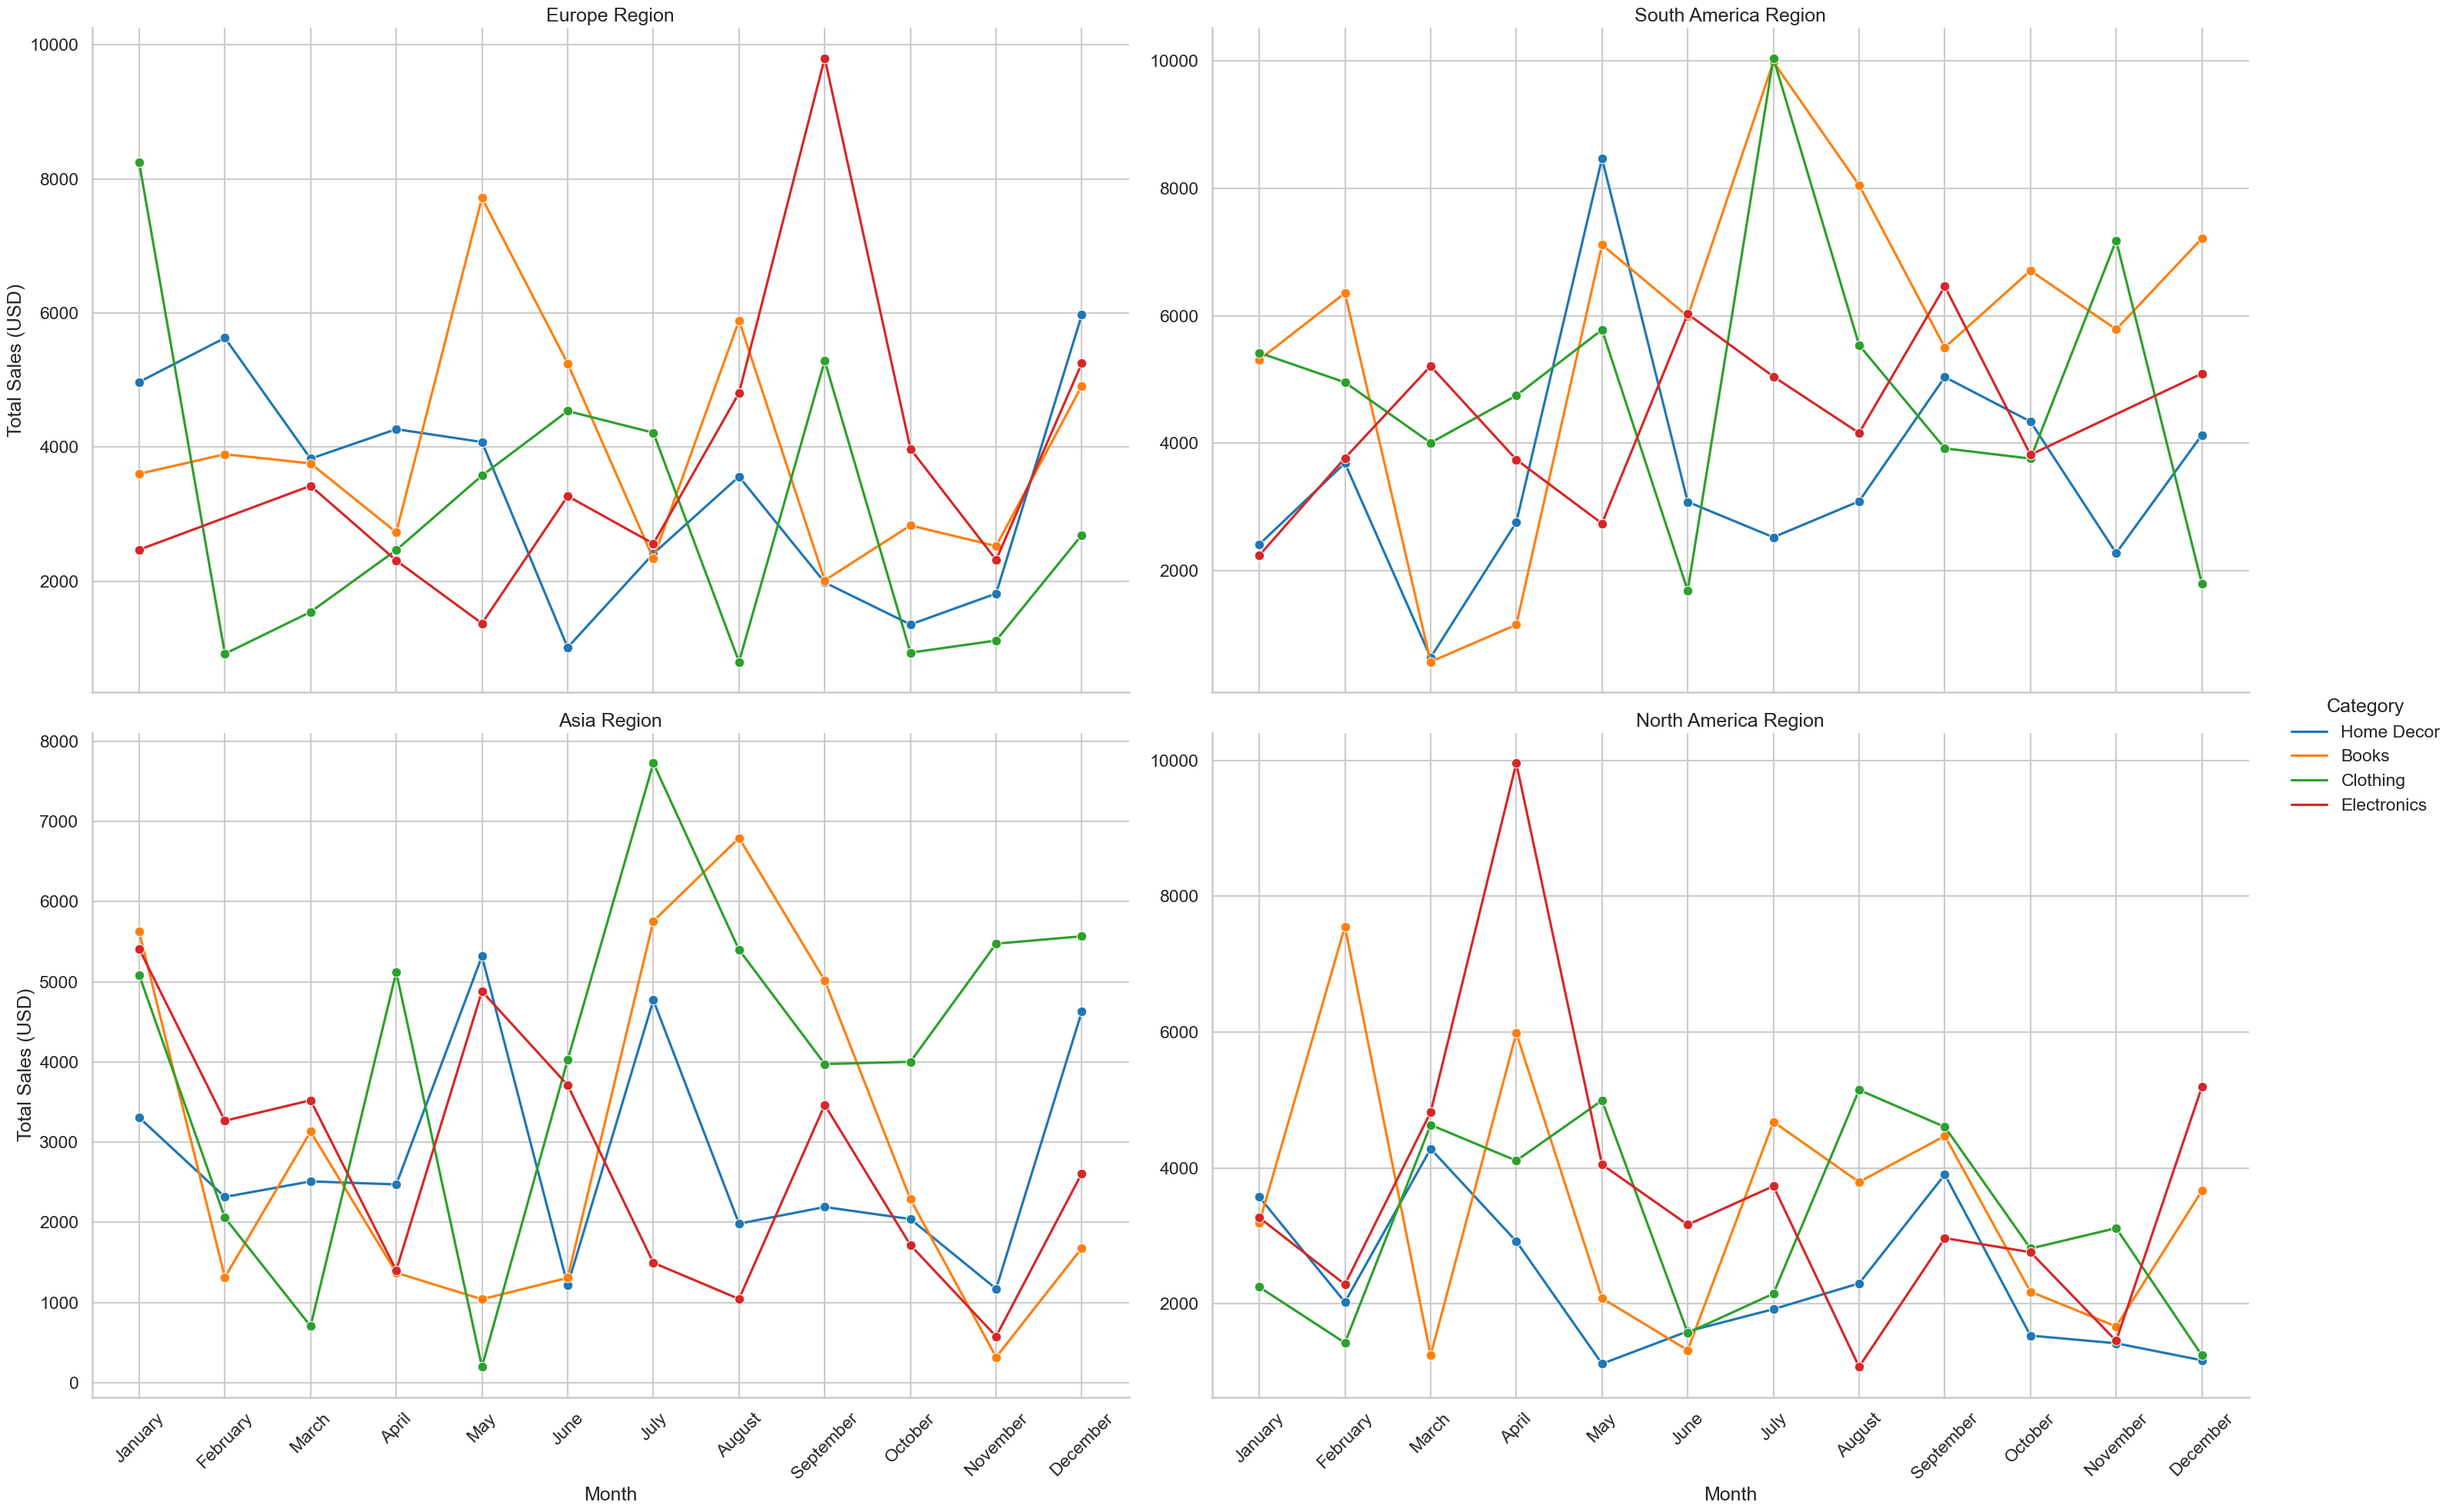

In [35]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Ensure TransactionDate is in datetime format
df['TransactionDate'] = pd.to_datetime(df['TransactionDate'], errors='coerce')

# Extract the month name from the TransactionDate
df['MonthName'] = df['TransactionDate'].dt.month_name()

# Group data by Region, MonthName, and Category, and calculate total sales
region_monthly_category_sales = df.groupby(['Region', 'MonthName', 'Category'])['TotalValue'].sum().reset_index()

# Preserve the correct order of months
month_order = [
    "January", "February", "March", "April", "May", "June", 
    "July", "August", "September", "October", "November", "December"
]

# Map months to numeric indices for sorting
region_monthly_category_sales['MonthIndex'] = region_monthly_category_sales['MonthName'].map(
    {month: idx for idx, month in enumerate(month_order)}
)

# Sort data by MonthIndex
region_monthly_category_sales.sort_values(by='MonthIndex', inplace=True)

# Set the style for the plots
sns.set(style="whitegrid", context="talk")

# Create a FacetGrid for region-wise separate plots
g = sns.FacetGrid(
    region_monthly_category_sales, 
    col='Region', 
    col_wrap=2, 
    height=10,       # Increased height
    aspect=1.5,     # Increased aspect ratio
    sharey=False
)

# Map the lineplot to each region
g.map(
    sns.lineplot, 
    'MonthName', 
    'TotalValue', 
    'Category', 
    palette='tab10', 
    marker='o'
)

# Customize the plots
g.set_axis_labels("Month", "Total Sales (USD)")
g.set_titles(col_template="{col_name} Region", fontsize=18)
g.set_xticklabels(rotation=45, labels=month_order)
g.add_legend(title="Category")

# Adjust layout
g.tight_layout()

# Show the plots
plt.show()


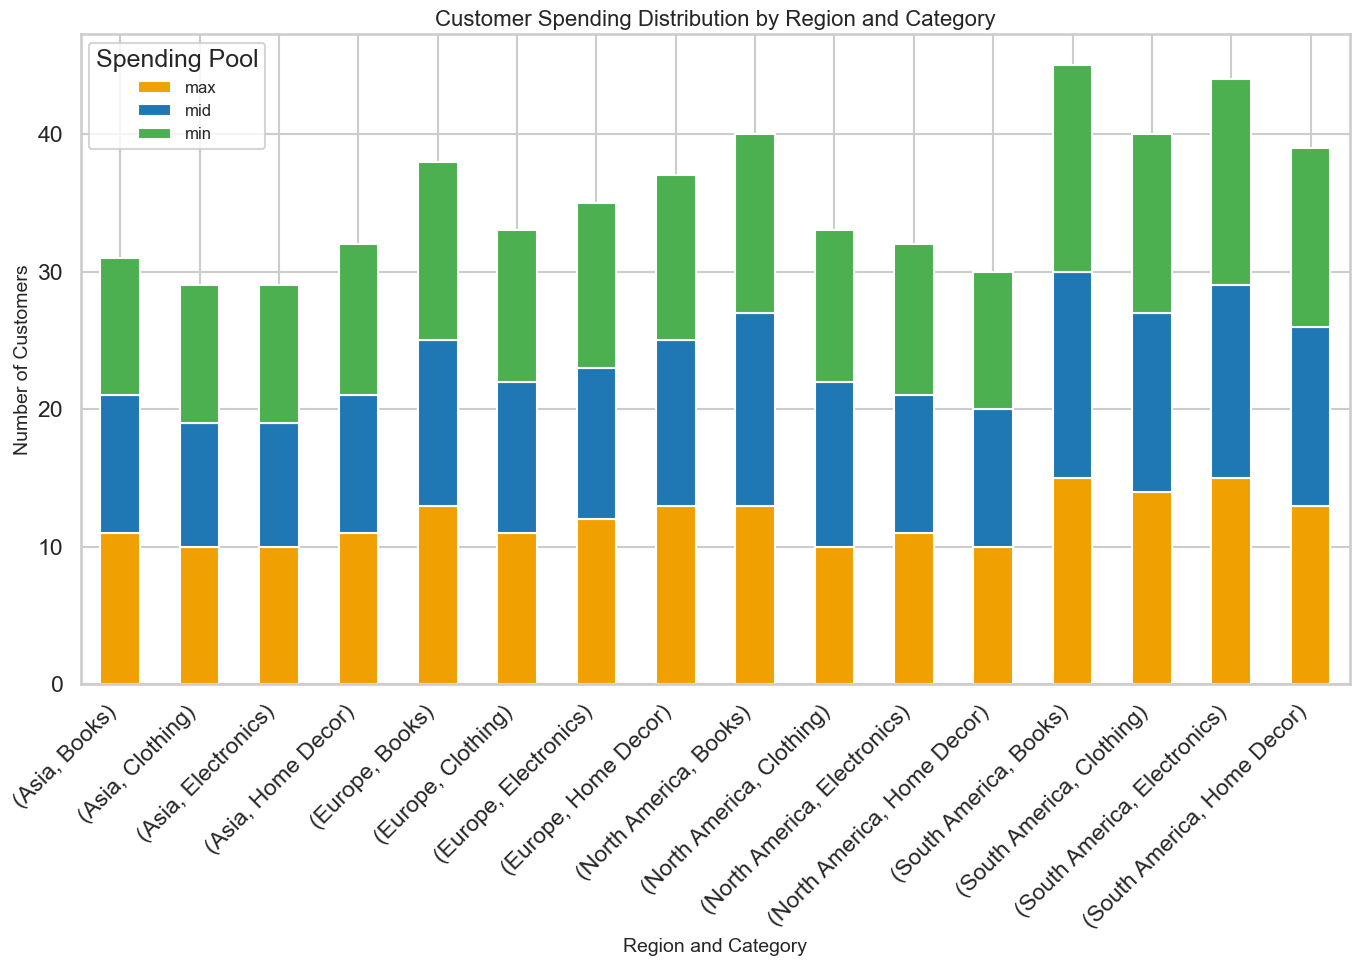

In [36]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Group the data by Region, Category, and CustomerID to get total spending
spending_data = df.groupby(['Region', 'Category', 'CustomerID']).agg({
    'TotalValue': 'sum'
}).reset_index()

# Define pool labels and ranges for min, mid, and max spending
def assign_pool(spending_data):
    # Calculate the 33rd and 66th percentiles of spending for each Region and Category
    percentiles = spending_data.groupby(['Region', 'Category'])['TotalValue'].quantile([0.33, 0.66]).unstack()
    
    # Assign pools based on percentiles
    def pool_assign(row):
        if row['TotalValue'] <= percentiles.loc[row['Region'], row['Category']][0.33]:
            return 'min'
        elif row['TotalValue'] <= percentiles.loc[row['Region'], row['Category']][0.66]:
            return 'mid'
        else:
            return 'max'
    
    spending_data['Pool'] = spending_data.apply(pool_assign, axis=1)
    return spending_data

# Apply pool assignment function to the spending data
spending_data = assign_pool(spending_data)

# Aggregate the data to count customers in each pool per region and category
pool_distribution = spending_data.groupby(['Region', 'Category', 'Pool']).agg({
    'CustomerID': 'nunique'
}).reset_index()

# Rename CustomerID to CustomerCount for clarity
pool_distribution.rename(columns={'CustomerID': 'CustomerCount'}, inplace=True)

# Pivot the table for stacked bar plotting
pool_pivot = pool_distribution.pivot_table(index=['Region', 'Category'], columns='Pool', values='CustomerCount', fill_value=0)

# Plot stacked bar chart
ax = pool_pivot.plot(kind='bar', stacked=True, figsize=(14, 10), color=['#F0A000', '#1F77B4', '#4CAF50'])

# Customize the plot
plt.title('Customer Spending Distribution by Region and Category', fontsize=16)
plt.xlabel('Region and Category', fontsize=14)
plt.ylabel('Number of Customers', fontsize=14)
plt.xticks(rotation=45, ha='right')
plt.legend(title='Spending Pool', fontsize=12)
plt.tight_layout()

# Show the plot
plt.show()


<Figure size 1200x800 with 0 Axes>

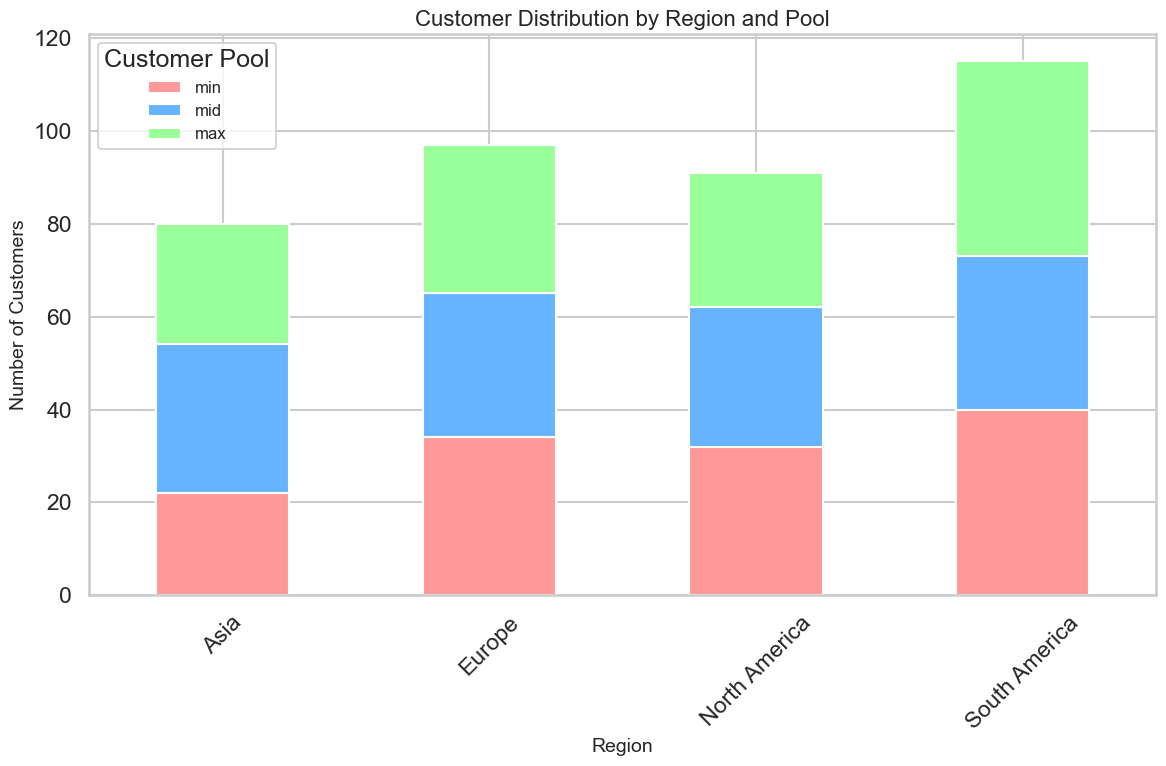

In [37]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Segment customers into pools based on purchase value
customer_category_sales = df.groupby(['CustomerID', 'Category', 'Region']).agg({
    'TotalValue': 'sum'
}).reset_index()

# Define pool thresholds
pool_labels = ['min', 'mid', 'max']
customer_category_sales['Pool'] = pd.qcut(
    customer_category_sales['TotalValue'], 
    q=3, 
    labels=pool_labels
)

# Count customers in each pool by region
region_pool_data = customer_category_sales.groupby(['Region', 'Pool'])['CustomerID'].nunique().reset_index()
region_pool_data.rename(columns={'CustomerID': 'CustomerCount'}, inplace=True)

# Pivot the data to get separate columns for each pool
region_pool_pivot = region_pool_data.pivot_table(
    index='Region', 
    columns='Pool', 
    values='CustomerCount', 
    fill_value=0
)

# Plot stacked bar chart
plt.figure(figsize=(12, 8))
region_pool_pivot.plot(kind='bar', stacked=True, color=['#FF9999', '#66B3FF', '#99FF99'], figsize=(12, 8))

# Customize the plot
plt.title('Customer Distribution by Region and Pool', fontsize=16)
plt.xlabel('Region', fontsize=14)
plt.ylabel('Number of Customers', fontsize=14)
plt.xticks(rotation=45)
plt.legend(title='Customer Pool', fontsize=12)
plt.tight_layout()

# Show the plot
plt.show()


C:\Users\Vaishnavi\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)
C:\Users\Vaishnavi\AppData\Local\Temp\ipykernel_30212\484960758.py:26: UserWarning: The figure layout has changed to tight
  plt.tight_layout()


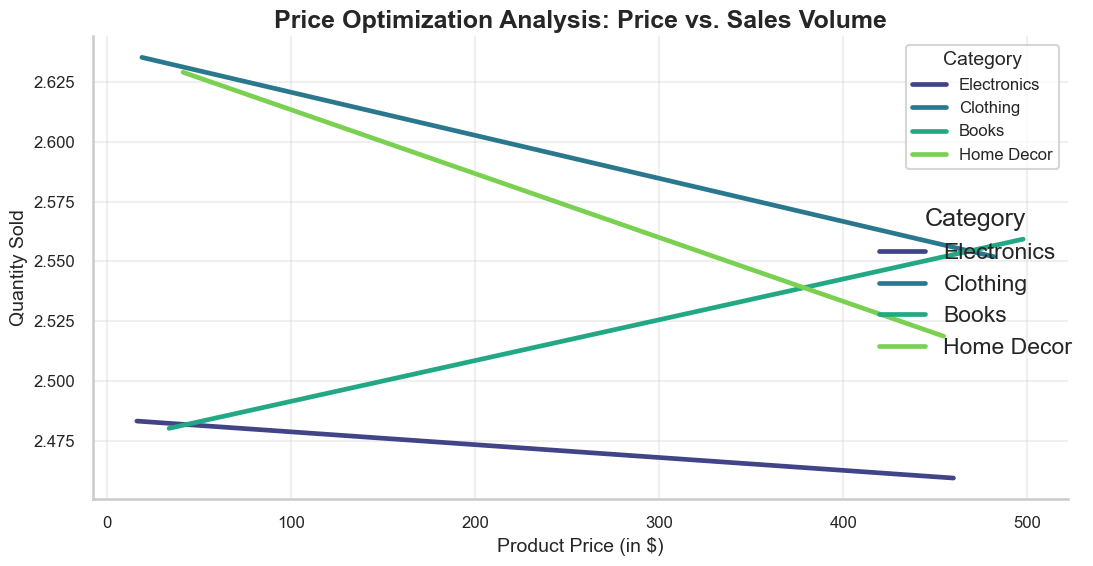

In [38]:
import matplotlib.pyplot as plt
import seaborn as sns


# Add regression lines for each category
sns.lmplot(
    data=df,
    x='ProductPrice',
    y='Quantity',
    hue='Category',
    scatter=False,
    palette='viridis',
    height=6,
    aspect=1.5,
    ci=None
)

# Customize the plot
plt.title('Price Optimization Analysis: Price vs. Sales Volume', fontsize=18, fontweight='bold')
plt.xlabel('Product Price (in $)', fontsize=14)
plt.ylabel('Quantity Sold', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.grid(alpha=0.3)
plt.legend(title='Category', fontsize=12, title_fontsize=14)
plt.tight_layout()

# Show the plot
plt.show()
